In [1]:
%pip install tensorflow
%pip install numpy
%pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 37.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 32.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.0 MB/s eta 0:00:

In [7]:
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib

import cv2
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Load in data

In [8]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
#the images
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train.shape

(50000, 32, 32, 3)

# Preprocessing the data

In [11]:
done_list_train = []

for picture in X_train:
    greyscaled= cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) #grayscaling
    normalized = greyscaled/255.0 #normalize greyscale
    done_list_train.append(normalized) #append to empty list
X_train=np.array(done_list_train) #make list into array
X_train = X_train.reshape(-1,1024) #reshape


done_list_test = []

for picture in X_test:
    greyscaled= cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) #grayscaling
    normalized = greyscaled/255.0 #normalize greyscale
    done_list_test.append(normalized) #append to empty list
X_test=np.array(done_list_test) #make list into array
X_test= X_test.reshape(-1,1024) #reshape

In [12]:
X_train.shape

(50000, 1024)

# Train a MLP classifier

In [13]:
#Define classifier and fit 

classifier = MLPClassifier(activation = "logistic", #use logistic sigmoid
                           hidden_layer_sizes = (20,), #number of neurons in hidden layer
                           max_iter=1000, #n_iterations 
                           random_state = 789)


model = classifier.fit(X_train, y_train)


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Classification report

In [14]:
y_pred = model.predict(X_test)

classifier_metrics = metrics.classification_report(y_test, y_pred, target_names =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])
print(classifier_metrics)


              precision    recall  f1-score   support

    airplane       0.46      0.34      0.39      1000
  automobile       0.42      0.43      0.43      1000
        bird       0.31      0.18      0.23      1000
         cat       0.27      0.20      0.23      1000
        deer       0.26      0.39      0.31      1000
         dog       0.38      0.27      0.31      1000
        frog       0.32      0.52      0.39      1000
       horse       0.38      0.48      0.42      1000
        ship       0.50      0.45      0.47      1000
       truck       0.47      0.42      0.44      1000

    accuracy                           0.37     10000
   macro avg       0.38      0.37      0.36     10000
weighted avg       0.38      0.37      0.36     10000



In [15]:
#Save the report in out
filepath = "../out/mlp_classification_report.txt"

with open(filepath, 'w') as file:
    file.write(classifier_metrics)

# Plot loss curve

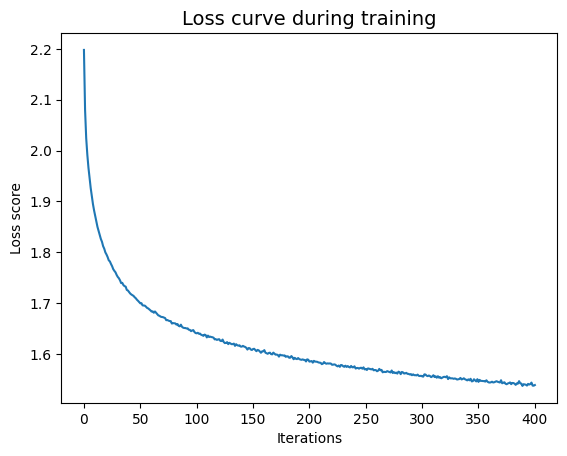

In [16]:
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()